## Emotion Detection through Deep Learning

Presenting we are going to go through the procedure of training, Testing, validating and understanding how a Convolutional Neural Network has been made and used to classify human emotioin based on thier facial expression. 

This is the project concluding the final evaluation for the course Computer Vision and Image anaylsis.



In [1]:
import os, shutil
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
# Directories for our training, testing and validation

train_dir = '/Downloads/tumelo/Train'
validation_dir = '/Downloads/tumelo/Validation'
test_dir = '/Downloads/tumelo/Test'

# Directory with our training angry faces pictures
train_angry_dir = '/Downloads/tumelo/Train/0'

# Directory with our training disgust faces pictures
train_disgust_dir = '/Downloads/tumelo/Train/1'

# Directory with our training fear faces pictures
train_fear_dir = '/Downloads/tumelo/Train/2'

# Directory with our training happy faces pictures
train_happy_dir = '/Downloads/tumelo/Train/3'

# Directory with our training sad faces pictures
train_sad_dir = '/Downloads/tumelo/Train/4'

# Directory with our training surprise faces pictures
train_surprise_dir = '/Downloads/tumelo/Train/5'

# Directory with our training neutral faces pictures
train_neutral_dir = '/Downloads/tumelo/Train/6'



# Directory with our validation angry faces pictures
validation_angry_dir = '/Downloads/tumelo/Validation/0'

# Directory with our validation disgust faces pictures
validation_disgust_dir = '/Downloads/tumelo/Validation/1'

# Directory with our validation fear faces pictures
validation_fear_dir = '/Downloads/tumelo/Validation/2'

# Directory with our validation happy faces pictures
validation_happy_dir = '/Downloads/tumelo/Validation/3'

# Directory with our validation sad faces pictures
validation_sad_dir = '/Downloads/tumelo/Validation/4'

# Directory with our validation surprise faces pictures
validation_surprise_dir = '/Downloads/tumelo/Validation/5'

# Directory with our validation neutral faces pictures
validation_neutral_dir = '/Downloads/tumelo/Validation/6'





# Directory with our testing angry faces pictures
test_angry_dir = '/Downloads/tumelo/Test/0'

# Directory with our testing disgust faces pictures
test_disgust_dir = '/Downloads/tumelo/Test/1'

# Directory with our testing fear faces pictures
test_fear_dir = '/Downloads/tumelo/Test/2'

# Directory with our testing happy faces pictures
test_happy_dir = '/Downloads/tumelo/Test/3'

# Directory with our testing sad faces pictures
test_sad_dir = '/Downloads/tumelo/Test/4'

# Directory with our testing surprise faces pictures
test_surprise_dir = '/Downloads/tumelo/Test/5'

# Directory with our testing neutral faces pictures
test_neutral_dir = '/Downloads/tumelo/Test/6'

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [5]:
print('Total training angry expression images:', len(os.listdir(train_angry_dir)))
print('Total training disgust expression images:', len(os.listdir(train_disgust_dir)))
print('Total training fear expression images:', len(os.listdir(train_fear_dir)))
print('Total training happy expression images:', len(os.listdir(train_happy_dir)))
print('Total training sad expression images:', len(os.listdir(train_sad_dir)))
print('Total training surprise expression images:', len(os.listdir(train_surprise_dir)))
print('Total training neutral expression images:', len(os.listdir(train_neutral_dir)))

print('Total validation of angry expression images:', len(os.listdir(validation_angry_dir)))
print('Total validation of disgust expression images:', len(os.listdir(validation_disgust_dir)))
print('Total validation of fear expression images:', len(os.listdir(validation_fear_dir)))
print('Total validation of happy expression images:', len(os.listdir(validation_happy_dir)))
print('Total validation of sad expression images:', len(os.listdir(validation_sad_dir)))
print('Total validation of surprise expression images:', len(os.listdir(validation_surprise_dir)))
print('Total validation of neutral expression images:', len(os.listdir(validation_neutral_dir)))

print('Total test of angry expression images:', len(os.listdir(test_angry_dir)))
print('Total test of disgust expression images:', len(os.listdir(test_disgust_dir)))
print('Total test of fear expression images:', len(os.listdir(test_fear_dir)))
print('Total test of happy expression images:', len(os.listdir(test_happy_dir)))
print('Total test of sad expression images:', len(os.listdir(test_sad_dir)))
print('Total test of surprise expression images:', len(os.listdir(test_surprise_dir)))
print('Total test of neutral expression images:', len(os.listdir(test_neutral_dir)))

Total training angry expression images: 3995
Total training disgust expression images: 436
Total training fear expression images: 4097
Total training happy expression images: 7215
Total training sad expression images: 4830
Total training surprise expression images: 3170
Total training neutral expression images: 4965
Total validation of angry expression images: 491
Total validation of disgust expression images: 55
Total validation of fear expression images: 528
Total validation of happy expression images: 879
Total validation of sad expression images: 594
Total validation of surprise expression images: 416
Total validation of neutral expression images: 626
Total test of angry expression images: 467
Total test of disgust expression images: 56
Total test of fear expression images: 496
Total test of happy expression images: 895
Total test of sad expression images: 653
Total test of surprise expression images: 415
Total test of neutral expression images: 607


we have X number of images


## Building our network

Since we are attacking a classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a `sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

Because we only have relatively few training samples, overfitting is going to be our number one concern. This is why we have two dropout layers. 1 right after the second convolution layer and the other after flattening.

In [16]:
from keras import layers
from keras import models
from keras.layers import Dropout

model = models.Sequential()

#1st convolution layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#2nd convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

#4th convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



#flatten
model.add(layers.Flatten())

model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
__________

For our compilation step, we'll go with the `RMSprop` optimizer as usual

In [19]:
from keras import optimizers

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Data preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our 
network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(48, 48),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(48, 48),
        batch_size=40,
        class_mode='binary')

Found 28708 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


Taking a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [21]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (40, 48, 48, 3)
Labels batch shape: (40,)


Let's fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200)

Epoch 1/100
200/200 [==============================] - 37s 186ms/step - loss: -36.0373 - acc: 0.0146 - val_loss: -37.2862 - val_acc: 0.0149
Epoch 2/100
200/200 [==============================] - 40s 200ms/step - loss: -36.6097 - acc: 0.0148 - val_loss: -37.3221 - val_acc: 0.0160
Epoch 3/100
200/200 [==============================] - 41s 205ms/step - loss: -36.9046 - acc: 0.0144 - val_loss: -36.8485 - val_acc: 0.0157
Epoch 4/100
200/200 [==============================] - 43s 213ms/step - loss: -36.9408 - acc: 0.0182 - val_loss: -37.2362 - val_acc: 0.0147
Epoch 5/100
200/200 [==============================] - 42s 211ms/step - loss: -36.7412 - acc: 0.0159 - val_loss: -37.2776 - val_acc: 0.0156
Epoch 6/100
200/200 [==============================] - 44s 219ms/step - loss: -36.8847 - acc: 0.0144 - val_loss: -37.1323 - val_acc: 0.0153
Epoch 7/100
200/200 [==============================] - 49s 243ms/step - loss: -37.2693 - acc: 0.0148 - val_loss: -37.0544 - val_acc: 0.0145
Epoch 8/100
200/200 

It is good practice to always save your models after training:

In [13]:
model.save('TRAINED_DATA.h5')

Let's plot the loss and accuracy of the model over the training and validation data during training:

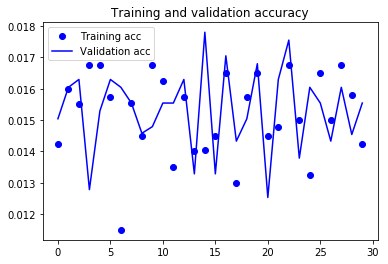

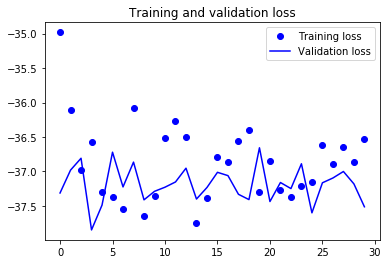

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Visualizing what the Convolutional network learn

we shall test

In [ ]:
from keras.models import load_model

model = load_model('TRAINED_DATA.h5')

This will be the input image we will use -- a picture of a cat, not part of images that the network was trained on:

In [ ]:
img_path = '/tumelo/Downloads/Test/0/Training_73732383.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(48, 48))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

Let's display our picture:

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

This channel appears to encode a diagonal edge detector. Let's try the 30th channel -- but note that your own channels may vary, since the specific filters learned by convolution layers are not deterministic.

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

This one looks like a "bright green dot" detector, useful to encode features in the eyes. At this point, let's go and plot a complete visualization of all the activations in the network. We'll extract and plot every channel in each of our 8 activation maps, and we will stack the results in one big image tensor, with channels stacked side by side.

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

A few remarkable things to note here:

* The first layer acts as a collection of various edge detectors. At that stage, the activations are still retaining almost all of the 
information present in the initial picture.
* As we go higher-up, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level 
concepts such as "human ear" or "human eye". Higher-up presentations carry increasingly less information about the visual contents of the 
image, and increasingly more information related to the class of the image.
* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are activated by the input 
image, but in the following layers more and more filters are blank. This means that the pattern encoded by the filter isn't found in the 
input image.